In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
bitcoin = pd.read_csv("../upbit_data/train_data_2023.csv", index_col=0)

In [8]:
bitcoin.shape

(344379, 122)

In [12]:
df = pd.read_csv("log_37.csv", index_col=0)
df.shape

(10035, 4)

In [13]:
bitcoin.iloc[0]['mid_price']

21092500.0

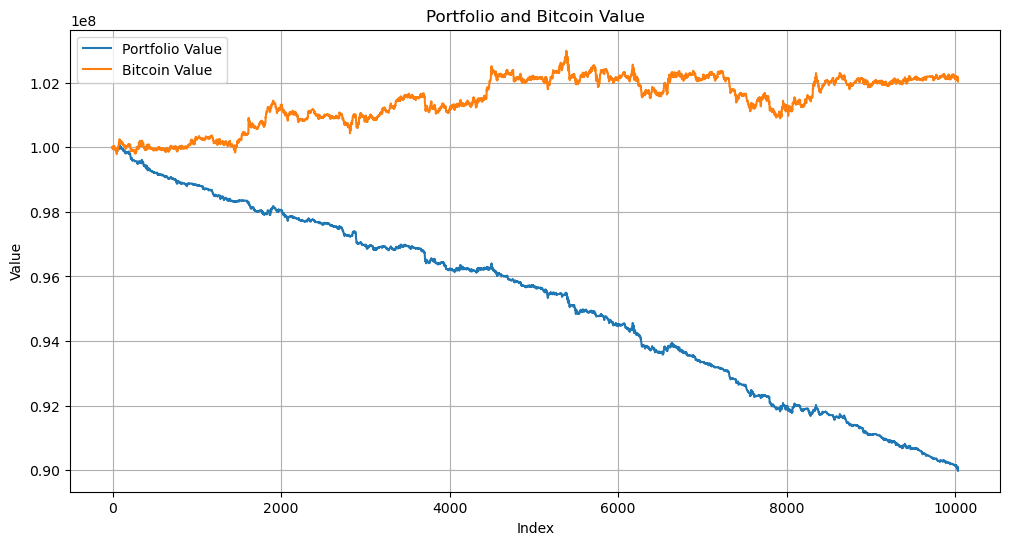

In [14]:
plt.figure(figsize=(12, 6))

# Plot the first graph (portfolio value)
df['value'].plot(label="Portfolio Value")
plt.xlabel("Min")
plt.ylabel("Value")

# Plot the second graph (Bitcoin value)
plt.plot(range(df.shape[0]), (bitcoin['mid_price'] / 21092500.0 * 1e8).iloc[:df.shape[0]], label="Bitcoin Value")
plt.xlabel("Index")
plt.ylabel("Value")

plt.title("Portfolio and Bitcoin Value")
plt.grid(True)

# Show a legend to differentiate the two lines
plt.legend()

# Show the combined plot
plt.show()


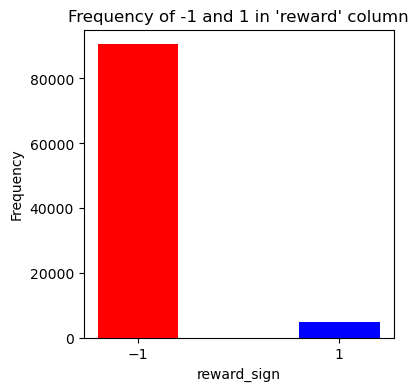

In [47]:
df['reward_sign'] = df['reward'].apply(lambda x: 1 if x > 0 else -1)

reward_value_counts = df['reward_sign'].value_counts()

plt.figure(figsize=(4, 4))
plt.bar(reward_value_counts.index, reward_value_counts.values, color=['red', 'blue'])
plt.title("Frequency of -1 and 1 in 'reward' column")
plt.xlabel("reward_sign")
plt.ylabel("Frequency")
plt.xticks([-1, 1])
plt.show()

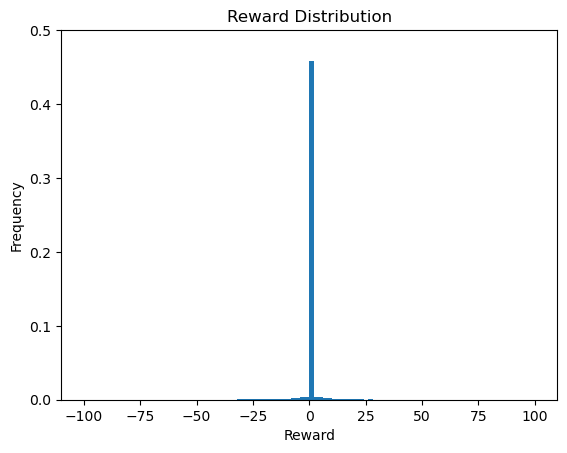

In [49]:
reward = round(df['reward'][df['reward'] != 1986], 4)

plt.hist(reward, bins=100, range=(-100, 100), density=True)
plt.ylim(0, 0.5)
plt.xlabel('Reward')
plt.ylabel('Frequency')
plt.title('Reward Distribution')
plt.show()


In [129]:
reward.mean(), reward.std()

(-1.1219248411528493, 17.83218600258026)

In [130]:
train_df = pd.read_csv("../upbit_data/train_data_2023.csv", index_col=0)
train_df = train_df.iloc[:df.shape[0]]

In [131]:
data = {
    'index': list(train_df.index),
    '1min_ago_change': train_df['1min_ago_change']
}

train_df = pd.DataFrame(data)

# 'index' 열을 datetime 형식으로 변환
train_df['index'] = pd.to_datetime(train_df['index'])

# 'index' 열을 날짜로 설정하여 데이터를 그룹화하고, 각 날짜에 대한 변동성 계산
train_df.set_index('index', inplace=True)  # 'index' 열을 인덱스로 설정

# 날짜별로 변동성 계산
H_volatility = train_df.resample('H')['1min_ago_change'].std()

In [132]:
H_volatility

index
2023-01-01 09:00:00         NaN
2023-01-01 10:00:00    0.000258
2023-01-01 11:00:00    0.000232
2023-01-01 12:00:00    0.000157
2023-01-01 13:00:00    0.000173
                         ...   
2023-02-11 15:00:00    0.000202
2023-02-11 16:00:00    0.000296
2023-02-11 17:00:00    0.000342
2023-02-11 18:00:00    0.000280
2023-02-11 19:00:00    0.000200
Freq: H, Name: 1min_ago_change, Length: 995, dtype: float64